<a href="https://colab.research.google.com/github/Anubhav3084/Deep-Learning/blob/main/PyTorch_Tutorial/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with Images & Logistic Regression using PyTorch**

## **Working with Images**


In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F51B80A8D90>, 5)

* It's a pair containing an image of 28px28px and a label.
* The image is an object of the class `PIL.Image.Image` which is a part of the python imaging library.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

* The statement `%matplotlib inline` indicates to Jupyter that we want to plot the graph within the notebook and not on the pop up window.
* Statements starting with `%` are called magic commands and are used to configure the behaviour of Jupyter itself.

Label: 5


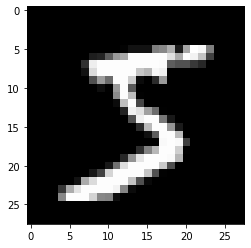

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

* PyTorch don't know how to work with images. We need to convert images into tensors.
* We can do this by specifying a transform while creating our dataset.

In [ ]:
import torchvision.transforms as transforms

* PyTorch datasets allow us to specify one or more transformations functions that are applied to the images as they are loaded.
* The `torchvision.transforms` module contain many such predefined functions.
* We'll use the `ToTensor` transform to convert images into PyTorch tensors.

In [ ]:
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


* The image is now converted to a 1x28x28 tensor.
* The first dimension tracks color channels.
* The 2nd and 3rd dimensions represent pixels along heigth and weight respectively

In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


* The value ranges from 0 to 1 with `0` representing black and `1` representing white.
* We can also plot tensor using `plt.imshow`.

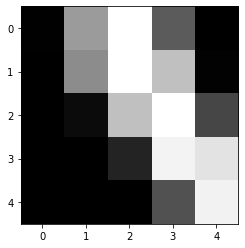

In [ ]:
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

## **Training and Validation Datasets**
While building real-world learning models, it's quite common to split the dataset into 3 parts:
1. **Training set** - used to train the model. (i.e. compute the loss and adjust the model's weights and biases using gradient descent)
2. **Validation set** - used to evaluate the model during training, adjust hyperparameters (learning rate, etc)
3. **Test set** - used to compare different models or approaches and report the model's final accuracy.

Since there is no predefined validation so we can randomly split them.

We can split the data using `random_split` method from PyTorch

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

* It's essential to choose a random samplefor creating a validation set. Training data is ofter sorted by the last target labels (i.e. images of 0 followed 1 then 2, etc)
* If we take last 20% dataset then validation set will have only 8's and 9's.

We can now create data loaders to help us load the data in batches. We'll use a batch size of 128.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

We set `shuffle=True` to ensure randomness in the batches generated in each epoch. This randomization helps generalize & speed up the training process. Onthe other hand, since the validation data loader in used only for evaluating the model, there is no need to shuffle the images.

## **Model**
* A **logistic regression** model is almost identical to a linear regression model. It contains weights and biases matrices, and output is obtained using simple matrix operations (`pred = x @ w.t + b`).
* As we did with linear regression, we can use `nn.Linear` to create the model instead of manually creating and initializing the matrices.
* Since `nn.Linear` expects each training example to be a vector, each `1x28x28` image tensor is flattened into a vector of size 784 (`28x28`) before being passed into the model.
* The output for each image is a vector of size 10, with each element signifying the probability of a particular target label (i.e., 0 to 9). The predicted label for an image is simply the one with the highest probability.

In [ ]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0216,  0.0219,  0.0049,  ..., -0.0071, -0.0305, -0.0267],
        [-0.0129, -0.0281, -0.0220,  ..., -0.0266, -0.0320,  0.0217],
        [-0.0128, -0.0314,  0.0257,  ..., -0.0225, -0.0006,  0.0350],
        ...,
        [-0.0282, -0.0337,  0.0095,  ...,  0.0139,  0.0002, -0.0310],
        [ 0.0214,  0.0276,  0.0351,  ...,  0.0227, -0.0106, -0.0308],
        [ 0.0353,  0.0039,  0.0162,  ...,  0.0319, -0.0039, -0.0039]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0275,  0.0169, -0.0235, -0.0344, -0.0328, -0.0095,  0.0232, -0.0186,
         0.0136,  0.0266], requires_grad=True)

We have a total of 7850 parameters here but conceptually nothing has changed. It's same as linear regression.
We'll take the first batch of 100 images from out dataset and pass them into our model.

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  outputs = model(images)
  break

tensor([6, 2, 7, 1, 2, 3, 2, 7, 8, 5, 2, 9, 0, 4, 0, 2, 2, 3, 3, 3, 8, 2, 0, 4,
        5, 7, 9, 4, 4, 6, 0, 2, 2, 9, 0, 9, 8, 9, 2, 2, 5, 2, 3, 6, 1, 9, 8, 7,
        5, 0, 1, 1, 0, 1, 9, 5, 8, 6, 0, 2, 1, 9, 2, 9, 2, 9, 7, 3, 1, 4, 2, 5,
        8, 2, 1, 3, 5, 1, 5, 3, 7, 2, 8, 9, 4, 7, 0, 7, 4, 3, 9, 8, 1, 8, 6, 1,
        9, 2, 8, 1, 6, 0, 9, 2, 1, 9, 8, 1, 6, 8, 8, 9, 8, 4, 6, 6, 4, 3, 1, 3,
        8, 0, 9, 4, 7, 4, 6, 9])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

* The code above leads to an error because our input data does not have the right shape. Our images are of the shape 1x28x28, but we need them to be vectors of sixe 784, i.e., we need to flatten them. We'll use the `.reshape` method of a tensor, which will allow us to efficiently 'view' each image as a flat vector without really creating a copy of the underlying data. 
* To include this additional functionality within our model, we need to define a custom model by extending the `nn.Module` class from PyTorch.

In [ ]:
images.shape

torch.Size([128, 1, 28, 28])

In [ ]:
images.reshape(128,784).shape

torch.Size([128, 784])

A class in Python provides a "blueprint" for creating objects. Let's look at an example of defining a new class in Python

In [ ]:
class Person:

  # class constructor
  def __init__(self, name, age):

    # object properties
    self.name = name
    self.age = age

    # method
  def say_hello(self):
    print("Hello my name is " + self.name + "!")

Here's how we create or *instantiate* an object of the class `Person`.

In [ ]:
bob = Person("Bob", 32)

The object `bob` is an instance of the class `Person`.
We can access the object's properties (also called attributes) or invoke its method using the `.` notation.

In [ ]:
bob.name, bob.age

('Bob', 32)

In [ ]:
bob.say_hello()

Hello my name is Bob!


Classes can also build upon or extend the functionality of existing classes. Let's extend the `nn.Module` class from PyTorch to define a custom model.

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
     xb = xb.reshape(-1, 784)
     out = self.linear(xb)
     return out

model = MnistModel()

* Inside the `__init__` constructor method, we instantiate the weights and biases using `nn.Linear`. And inside `forward` method, which is invoked when we pass a batch of inputs to the model, we flatten the input tensor and pass it into `self.linear`.
* `xb.reshape(-1, 28*28)` indicates to PyTorch that we want a view of `xb` tensor with two dimensions. The length along the 2nd dimension is 28*28 = 784. One argument to `.reshape` can be set to -1 (in this case the 1st dimension) to let PyTorch figure it out automatically based on the shape of the original tensor.
* Note that the model no longer has `.weight`, `.bias` attributes (as they are now inside `.linear` attribute) but it does have a `.parameter` method that returns a list containing the weights and bias.

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0026,  0.0034,  0.0027,  ..., -0.0060, -0.0038,  0.0269],
         [-0.0133,  0.0052,  0.0282,  ..., -0.0274, -0.0003,  0.0091],
         [-0.0119,  0.0289,  0.0343,  ...,  0.0034,  0.0273,  0.0156],
         ...,
         [-0.0110,  0.0225, -0.0295,  ..., -0.0208, -0.0320,  0.0089],
         [ 0.0273, -0.0225, -0.0273,  ..., -0.0357,  0.0344,  0.0346],
         [-0.0185, -0.0195,  0.0019,  ...,  0.0286, -0.0064,  0.0348]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0121,  0.0269,  0.0135,  0.0299, -0.0080,  0.0304, -0.0138, -0.0345,
          0.0101,  0.0089], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
  print(images.shape)
  outputs = model(images)
  break

print('Outputs.shape : ', outputs.shape)
print('Sample outputs : ', outputs[:2].data)

torch.Size([128, 1, 28, 28])
Outputs.shape :  torch.Size([128, 10])
Sample outputs :  tensor([[-0.2084, -0.0774,  0.0279,  0.0668,  0.0196, -0.1931, -0.0639, -0.0195,
          0.1689, -0.0672],
        [-0.1962,  0.0757,  0.0624, -0.0772, -0.3197, -0.0958, -0.1059, -0.1870,
         -0.0629,  0.0425]])


* For each of the 100 input images, we get 10 outputs, one for each class. As duscussed earlier, we'd like these outputs to represent probabilities. Each output row's elements must lie between 0 to 1 and add up to 1, which is not in the case

* To convert the output rows into probabilities, we use the softmax function, which has the following formula:
\begin{equation} {S(y_{i}) =  \sum_{j} \frac{e^{y_{i}}}{e^{y_{j}}}\  } \end{equation}
* First, we replace each element `yi` in an output row by `e^yi`, making all the elements positive.
* Then we divide them by the sum of all those values, which makes it a probability.

In [ ]:
import torch.nn.functional as F

* The softmax function is included in the `torch.nn.functional` package and requires us to specify a dimension along which the function should be applied.
* Here we have 2 dimension in the output, `dim=0` is along the rows and `dim=1` is along the columns (i.e.: 10 values in the output).

In [ ]:
outputs[:2]

tensor([[-0.2084, -0.0774,  0.0279,  0.0668,  0.0196, -0.1931, -0.0639, -0.0195,
          0.1689, -0.0672],
        [-0.1962,  0.0757,  0.0624, -0.0772, -0.3197, -0.0958, -0.1059, -0.1870,
         -0.0629,  0.0425]], grad_fn=<SliceBackward0>)

In [ ]:
# apply softmax for each output
probs = F.softmax(outputs, dim=1)

# look at sample probabilities
print("sample probabilities:\n", probs[0:2].data)

# add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

sample probabilities:
 tensor([[0.0836, 0.0952, 0.1058, 0.1100, 0.1050, 0.0848, 0.0965, 0.1009, 0.1219,
         0.0962],
        [0.0890, 0.1168, 0.1152, 0.1002, 0.0786, 0.0984, 0.0974, 0.0898, 0.1017,
         0.1130]])
Sum:  0.9999999403953552


Finally, we can determine the predicted label for each image by simply choosing the index of the element with the highest probability in each output row. We can do this using `torch.max`, which returns each row's largest element and the corresponding index.

In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([8, 1, 8, 8, 6, 8, 2, 2, 2, 9, 8, 8, 9, 8, 9, 9, 7, 2, 1, 9, 0, 5, 1, 2,
        2, 8, 9, 1, 7, 9, 0, 8, 8, 9, 7, 2, 0, 8, 2, 0, 1, 2, 7, 8, 9, 1, 7, 1,
        5, 5, 9, 8, 4, 4, 9, 1, 8, 1, 4, 9, 1, 2, 3, 2, 2, 7, 2, 8, 2, 2, 1, 8,
        1, 8, 8, 8, 2, 8, 8, 2, 8, 2, 8, 8, 4, 2, 7, 9, 8, 1, 8, 0, 2, 2, 9, 7,
        8, 9, 9, 9, 8, 2, 9, 8, 7, 2, 2, 8, 1, 2, 1, 9, 6, 8, 9, 8, 1, 2, 8, 8,
        1, 9, 8, 1, 2, 8, 2, 2])
tensor([0.1219, 0.1168, 0.1316, 0.1304, 0.1155, 0.1326, 0.1142, 0.1210, 0.1244,
        0.1278, 0.1159, 0.1248, 0.1202, 0.1156, 0.1325, 0.1264, 0.1200, 0.1247,
        0.1351, 0.1279, 0.1302, 0.1185, 0.1295, 0.1283, 0.1211, 0.1254, 0.1272,
        0.1267, 0.1309, 0.1277, 0.1143, 0.1483, 0.1282, 0.1241, 0.1311, 0.1268,
        0.1222, 0.1215, 0.1299, 0.1232, 0.1348, 0.1206, 0.1442, 0.1228, 0.1172,
        0.1399, 0.1306, 0.1266, 0.1247, 0.1250, 0.1270, 0.1266, 0.1205, 0.1223,
        0.1354, 0.1304, 0.1167, 0.1355, 0.1113, 0.1340, 0.1168, 0.1328, 0.1165,
       

The numbers printed above are the predicted labsls alonf with their predictions probabilities. Let's compare them with the actual labels.

In [ ]:
labels

tensor([9, 6, 2, 5, 5, 2, 1, 1, 4, 7, 3, 3, 2, 9, 0, 6, 7, 4, 2, 0, 3, 1, 5, 4,
        1, 5, 9, 0, 5, 0, 3, 3, 3, 6, 6, 9, 1, 5, 4, 3, 6, 2, 8, 6, 5, 0, 1, 2,
        4, 3, 7, 6, 7, 2, 3, 7, 2, 0, 2, 9, 1, 6, 6, 4, 8, 0, 0, 0, 6, 4, 7, 8,
        2, 7, 0, 2, 1, 3, 0, 4, 4, 4, 4, 1, 5, 1, 8, 2, 3, 1, 8, 3, 4, 4, 7, 5,
        5, 9, 0, 3, 8, 8, 2, 5, 6, 6, 6, 8, 8, 7, 6, 4, 4, 3, 5, 1, 0, 9, 3, 8,
        2, 4, 1, 9, 9, 8, 4, 1])

## **Evaluation Metric and Loss Function**
Just as with linear regression, we need a way to evaluate how well our model is performing. A natural way to do this would be to find the precentage of labels that were predicted correctly, i.e, the **accuracy** of the predictions.

In [ ]:
preds

tensor([8, 1, 8, 8, 6, 8, 2, 2, 2, 9, 8, 8, 9, 8, 9, 9, 7, 2, 1, 9, 0, 5, 1, 2,
        2, 8, 9, 1, 7, 9, 0, 8, 8, 9, 7, 2, 0, 8, 2, 0, 1, 2, 7, 8, 9, 1, 7, 1,
        5, 5, 9, 8, 4, 4, 9, 1, 8, 1, 4, 9, 1, 2, 3, 2, 2, 7, 2, 8, 2, 2, 1, 8,
        1, 8, 8, 8, 2, 8, 8, 2, 8, 2, 8, 8, 4, 2, 7, 9, 8, 1, 8, 0, 2, 2, 9, 7,
        8, 9, 9, 9, 8, 2, 9, 8, 7, 2, 2, 8, 1, 2, 1, 9, 6, 8, 9, 8, 1, 2, 8, 8,
        1, 9, 8, 1, 2, 8, 2, 2])

In [ ]:
preds == labels

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
         True, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
         True, False, False, False, False, False, False,  True, False, False,
         True, False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False,  True, False, False])

We see how many are true and count them to find our accuracy

In [ ]:
torch.sum(preds==labels)

tensor(13)

In [ ]:
# converting tensor to scalar
torch.sum(preds==labels).item()

13

In [ ]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.1016)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:
1. It's not differentiable function. `torch.sum` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.
2. It dosen't take into account the actual proabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For, these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification is the **cross-entropy**, which has the following formula:
\begin{equation} {D(\hat{y},y) =  -\sum_j y_jln\hat{y_j}  } \end{equation}
* If the probability is close to 1 then logarithm is close to 0.
* If probability is close to 0 then logarithm is a large negative value.
* Hence we multiply the result with -1 an it can be considered as a loss.
* Finally, we take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of `torch.nn.functional` package. It also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3132, grad_fn=<NllLossBackward0>)


## **Training the model**
Training process is similar to linear regression, with the addition of a "validation phase" to evaluate the model in each epoch. Below is a pseudocede for the same. 

    for epoch in range(num_epochs):
    
      # training phase
      for batch in train_loader:

        # generate predictions
        # calculate loss
        # compute gradient
        # update weights
        # reset gradients

      # validation phase
      for batch in val_loader:

        # generate predictions
        # calculate loss
        # calculate metrics (accuracy etc.)

      # calculcate average validation loss & metrics
      # log epoch, loss & metrics for inspection

* Some parts of the training loop are specific to the problem we are solving (e.g. loss function, metrics, etc.) whereas others are generic and can be applied to any deep learning problem.
* We'll include the problem-independent parts within a function called `fit`, which will be used to train the model. The problem-specific parts will be implemented by adding new methods to the `nn.Module` class.

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  optimizer = opt_func(model.parameters(), lr)
  history = [] # for recording epoch-wise reuslts

  for epoch in range(epochs):

    # training phase
    for batch in val_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # valitation phase
    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history

* The `fit` function recors the validation loss and metric from each epoch. It returns a history of the training, useful for debugging and visualization.
* Configurations like batch size, learning rate, etc are called hyperparameters. These need to picked in advanced while training machine learning models. Choosing the  right hyperparameters is critical for training a reasonably accurate model within a reasonable amount of time.

Let's define the `evaluate` function, used in the validation phase of `fit`.

In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

Finally, let's redefine the `MnistModel` class to include additional methods `training_step`, `validation_step`, `validation_epoch_end` and `epoch_end` used by `fit` and `evaluate`.

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
     xb = xb.reshape(-1, 784)
     out = self.linear(xb)
     return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)                    # generate predictions
    loss = F.cross_entropy(out, labels)   # calculate loss
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)                    # generate predictions
    loss = F.cross_entropy(out, labels)   # calculate loss
    acc = accuracy(out, labels)           # calculate accuracy
    return {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # combine losses
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()      # combine accuracies
    return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}

  def epoch_end(self, epoch, results):
    print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, results['val_loss'], results['val_acc']))


model = MnistModel()

Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights and biases

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.09849683195352554, 'val_loss': 2.3161683082580566}

The initial accuracy is around 7%

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 2.2268, val_acc: 0.1764
Epoch [1], val_loss: 2.1467, val_acc: 0.3223
Epoch [2], val_loss: 2.0729, val_acc: 0.4396
Epoch [3], val_loss: 2.0042, val_acc: 0.5315
Epoch [4], val_loss: 1.9399, val_acc: 0.5938


With just 5 epochs of training, our model has reached an accuracy of 63% on the validation set.

In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8794, val_acc: 0.6401
Epoch [1], val_loss: 1.8225, val_acc: 0.6713
Epoch [2], val_loss: 1.7689, val_acc: 0.6930
Epoch [3], val_loss: 1.7183, val_acc: 0.7100
Epoch [4], val_loss: 1.6707, val_acc: 0.7223


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6258, val_acc: 0.7314
Epoch [1], val_loss: 1.5835, val_acc: 0.7393
Epoch [2], val_loss: 1.5435, val_acc: 0.7468
Epoch [3], val_loss: 1.5058, val_acc: 0.7538
Epoch [4], val_loss: 1.4702, val_acc: 0.7586


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4365, val_acc: 0.7647
Epoch [1], val_loss: 1.4047, val_acc: 0.7707
Epoch [2], val_loss: 1.3745, val_acc: 0.7742
Epoch [3], val_loss: 1.3460, val_acc: 0.7784
Epoch [4], val_loss: 1.3189, val_acc: 0.7819


In [ ]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.2932, val_acc: 0.7847
Epoch [1], val_loss: 1.2688, val_acc: 0.7871
Epoch [2], val_loss: 1.2457, val_acc: 0.7901
Epoch [3], val_loss: 1.2236, val_acc: 0.7932
Epoch [4], val_loss: 1.2026, val_acc: 0.7958


In [ ]:
history6 = fit(10, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1826, val_acc: 0.7976
Epoch [1], val_loss: 1.1635, val_acc: 0.7999
Epoch [2], val_loss: 1.1453, val_acc: 0.8024
Epoch [3], val_loss: 1.1278, val_acc: 0.8052
Epoch [4], val_loss: 1.1112, val_acc: 0.8066
Epoch [5], val_loss: 1.0953, val_acc: 0.8082
Epoch [6], val_loss: 1.0800, val_acc: 0.8099
Epoch [7], val_loss: 1.0653, val_acc: 0.8122
Epoch [8], val_loss: 1.0513, val_acc: 0.8136
Epoch [9], val_loss: 1.0378, val_acc: 0.8149


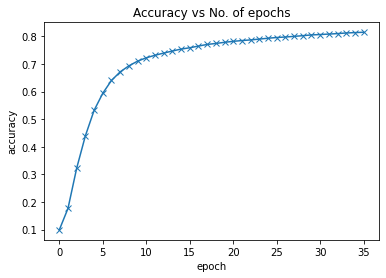

In [ ]:
history = [result0] + history1 + history2 + history3 + history4 + history5 + history6
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs No. of epochs');

## **Testing with individual images**
While we have been tracking the overall accuracy of a model so far, it's good idea to look at model's results on some sample images. Let's test our model with some images from the predefined dataset of 10000 images.

In [ ]:
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape:  torch.Size([1, 28, 28])
Label:  7


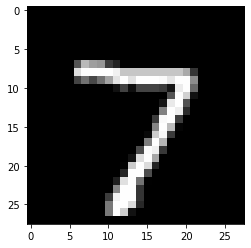

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape: ', img.shape)
print('Label: ', label)

Let's define a helper function `predict_image`, which returms the predicted label for a single image tensor

In [ ]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

* We use `.unsqueeze` to add another dimesion at the begining of the image to make it 1x1x28x28.
* This is done because our model accepts only batch of data so we convert our image to a batch containing one imag only.

In [ ]:
def predict_image(img, model):
  xb = img.unsqueeze(0)
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return preds[0].item()

Label: 7 Predicted: 7


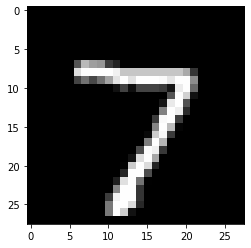

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 0 Predicted: 0


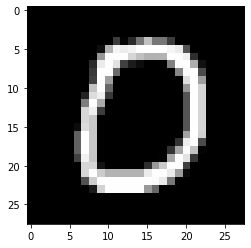

In [ ]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 9 Predicted: 3


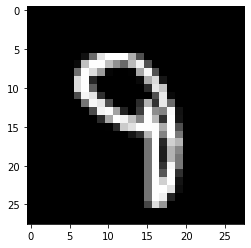

In [ ]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

Label: 2 Predicted: 8


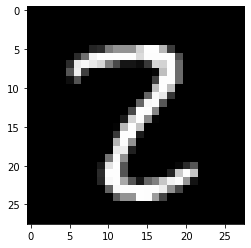

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, 'Predicted:', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8211914300918579, 'val_loss': 1.0142923593521118}

We expect this to be similar to the accuracy/loss on the validation set. If, not we might need a better validation set that has similar data and distribution as the test set(which ofter comes from real world data).

## **Saving and Loading the model**

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

The `.state_dict` method returns an `OrderedDict` containing all the weights and bias matrices mapped to the right attributes of the model.

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0229,  0.0040,  0.0324,  ..., -0.0208,  0.0111, -0.0053],
                      [-0.0301,  0.0297,  0.0152,  ..., -0.0268,  0.0037,  0.0161],
                      [ 0.0251,  0.0040,  0.0094,  ..., -0.0013,  0.0354,  0.0276],
                      ...,
                      [ 0.0335,  0.0070, -0.0178,  ...,  0.0244,  0.0047,  0.0338],
                      [ 0.0220, -0.0263,  0.0208,  ...,  0.0163,  0.0046, -0.0097],
                      [-0.0277, -0.0262, -0.0344,  ..., -0.0140, -0.0008, -0.0339]])),
             ('linear.bias',
              tensor([-0.0412,  0.0486,  0.0006,  0.0111,  0.0010,  0.0248,  0.0072,  0.0032,
                      -0.0190,  0.0236]))])

To load the model weights, we can instantiate a new object of the class `MnistModel`, and use the `.load_state_dict` method.

In [ ]:
model2 = MnistModel()
print(model2.state_dict())
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0279,  0.0340,  0.0119,  ...,  0.0325, -0.0349, -0.0176],
        [-0.0291,  0.0182,  0.0103,  ..., -0.0160,  0.0163,  0.0129],
        [-0.0093, -0.0355, -0.0201,  ...,  0.0001,  0.0296, -0.0225],
        ...,
        [ 0.0352,  0.0102,  0.0275,  ..., -0.0083,  0.0135, -0.0103],
        [ 0.0114, -0.0047, -0.0159,  ...,  0.0133,  0.0334, -0.0354],
        [ 0.0318, -0.0270,  0.0314,  ...,  0.0111, -0.0272,  0.0339]])), ('linear.bias', tensor([-0.0209,  0.0113, -0.0296, -0.0218, -0.0224, -0.0239, -0.0234,  0.0049,
         0.0351, -0.0110]))])


OrderedDict([('linear.weight',
              tensor([[-0.0229,  0.0040,  0.0324,  ..., -0.0208,  0.0111, -0.0053],
                      [-0.0301,  0.0297,  0.0152,  ..., -0.0268,  0.0037,  0.0161],
                      [ 0.0251,  0.0040,  0.0094,  ..., -0.0013,  0.0354,  0.0276],
                      ...,
                      [ 0.0335,  0.0070, -0.0178,  ...,  0.0244,  0.0047,  0.0338],
                      [ 0.0220, -0.0263,  0.0208,  ...,  0.0163,  0.0046, -0.0097],
                      [-0.0277, -0.0262, -0.0344,  ..., -0.0140, -0.0008, -0.0339]])),
             ('linear.bias',
              tensor([-0.0412,  0.0486,  0.0006,  0.0111,  0.0010,  0.0248,  0.0072,  0.0032,
                      -0.0190,  0.0236]))])

Verify if it gives the same result as previous model or not.

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.8211914300918579, 'val_loss': 1.0142923593521118}